In [54]:
import pandas as pd

In [55]:
order_list = pd.read_excel("F:/DASCM/SC.xlsx")

*order list table*

In [56]:
order_list.head()

,Order ID,Order Date,Origin Port,Carrier,TPT,Service Level,Ship ahead day count,Ship Late Day count,Customer,Plant Code,Destination Port,Unit quantity,Weight
0,1.447296e+09,2013-05-26,PORT09,V44_3,1,CRF,3,0,11039000000,PLANT16,PORT09,808,14.30
1,1.447158e+09,2013-05-26,PORT09,V44_3,1,CRF,3,0,11039000000,PLANT16,PORT09,3188,87.94
2,1.447139e+09,2013-05-26,PORT09,V44_3,1,CRF,3,0,11039000000,PLANT16,PORT09,2331,61.20
3,1.447364e+09,2013-05-26,PORT09,V44_3,1,CRF,3,0,11039000000,PLANT16,PORT09,847,16.16
4,1.447364e+09,2013-05-26,PORT09,V44_3,1,CRF,3,0,11039000000,PLANT16,PORT09,2163,52.34


**General stats of order table**

In [49]:
order_list.describe()

,TPT,Ship ahead day count,Ship Late Day count,Customer,Unit quantity,Weight
count,9215.000000,9215.000000,9215.000000,9.215000e+03,9215.000000,9215.000000
mean,1.717743,1.852306,0.039935,9.383542e+09,3202.747151,19.871688
std,0.630500,1.922302,0.319625,2.672076e+09,15965.622260,66.569064
min,0.000000,0.000000,0.000000,5.005239e+09,235.000000,0.000000
25%,1.000000,0.000000,0.000000,5.005760e+09,330.000000,1.407430
50%,2.000000,3.000000,0.000000,1.101000e+10,477.000000,4.440000
75%,2.000000,3.000000,0.000000,1.101000e+10,1275.500000,13.325673
max,4.000000,6.000000,6.000000,1.104600e+10,561847.000000,2338.405126


In [50]:
order_list.nunique()

Order Date                 1
Origin Port                3
Carrier                    3
TPT                        5
Service Level              3
Ship ahead day count       5
Ship Late Day count        4
Customer                  32
Plant Code                 7
Destination Port           1
Unit quantity           2624
Weight                  5899
dtype: int64

In [51]:
order_list.info()

<class 'pandas.core.frame.DataFrame'>
Float64Index: 9215 entries, 1447296446.7 to 1447328130.7
Data columns (total 12 columns):
Order Date              9215 non-null datetime64[ns]
Origin Port             9215 non-null object
Carrier                 9215 non-null object
TPT                     9215 non-null int64
Service Level           9215 non-null object
Ship ahead day count    9215 non-null int64
Ship Late Day count     9215 non-null int64
Customer                9215 non-null int64
Plant Code              9215 non-null object
Destination Port        9215 non-null object
Unit quantity           9215 non-null int64
Weight                  9215 non-null float64
dtypes: datetime64[ns](1), float64(1), int64(5), object(5)
memory usage: 935.9+ KB


**Univariate Analysis of Categorical variables - Frequency of Carrier Type**

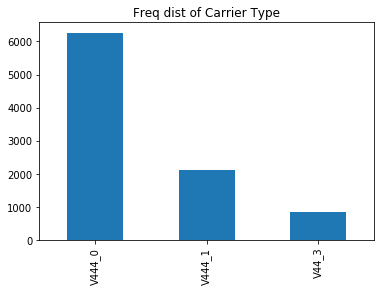

In [52]:
order_list['Carrier'].value_counts().plot.bar(title='Freq dist of Carrier Type')


**Frequency of Service Level**

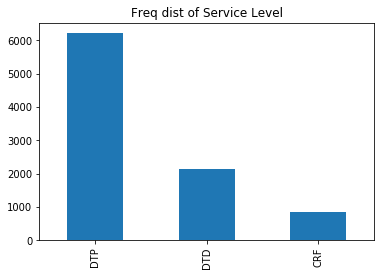

In [86]:
order_list['Service Level'].value_counts().plot.bar(title='Freq dist of Service Level')


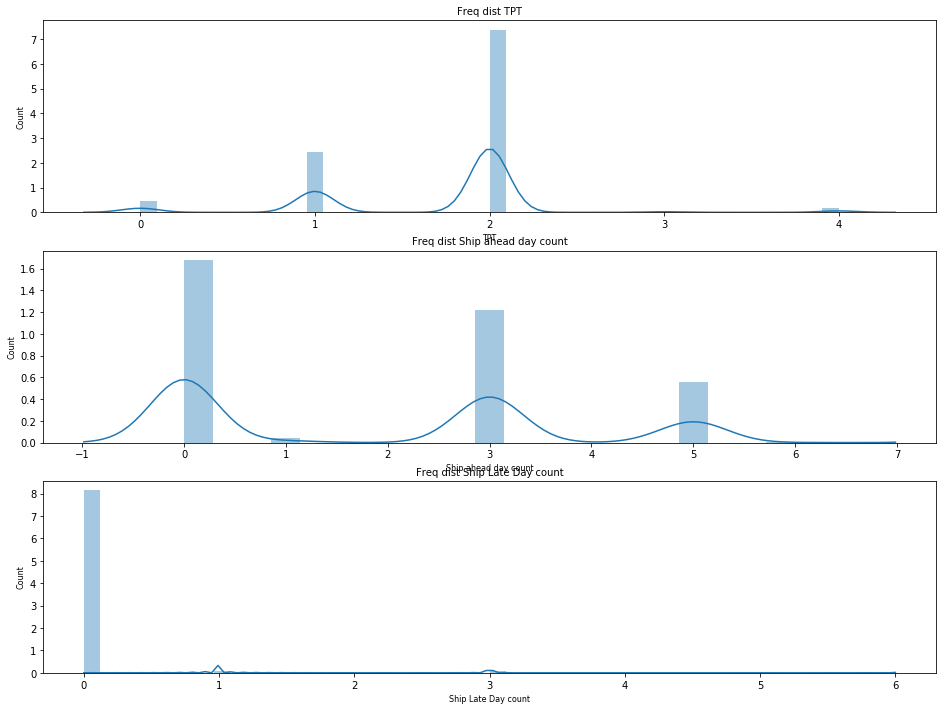

In [87]:
cols = ['TPT','Ship ahead day count', 'Ship Late Day count']

fig, ax = plt.subplots(len(cols), figsize=(16,12))

for i, col_val in enumerate(cols):

    sns.distplot(order_list[col_val], hist=True, ax=ax[i])
    ax[i].set_title('Freq dist '+col_val, fontsize=10)
    ax[i].set_xlabel(col_val, fontsize=8)
    ax[i].set_ylabel('Count', fontsize=8)

plt.show()

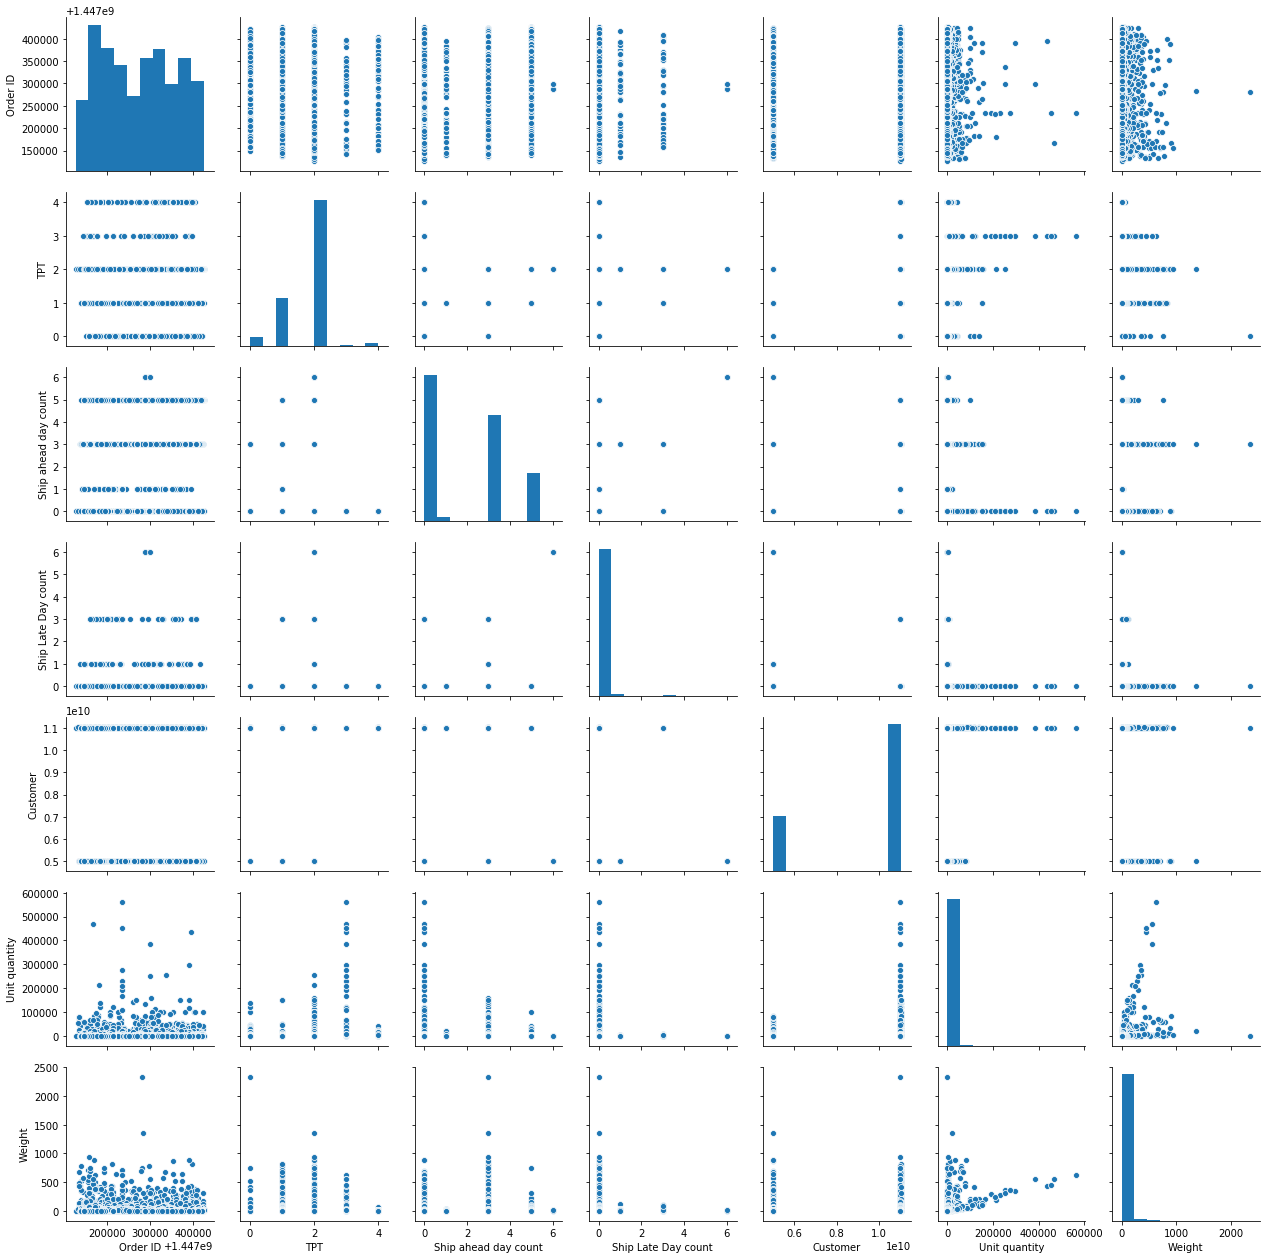

In [88]:
sns.pairplot(order_list)

**REPLACE PLANT PORT TO NUMBER - Handling Categorical data**

*Freight_Rates Table*

In [6]:
Freight_Rates = pd.read_excel("F:/DASCM/SC.xlsx", sheet_name=1)

In [7]:
Freight_Rates.head()

,Carrier,orig_port_cd,dest_port_cd,minm_wgh_qty,max_wgh_qty,svc_cd,minimum cost,rate,mode_dsc,tpt_day_cnt,Carrier type
0,V444_6,PORT08,PORT09,250.0,499.99,DTD,43.2272,0.7132,AIR,2,V88888888_0
1,V444_6,PORT08,PORT09,65.0,69.99,DTD,43.2272,0.7512,AIR,2,V88888888_0
2,V444_6,PORT08,PORT09,60.0,64.99,DTD,43.2272,0.7892,AIR,2,V88888888_0
3,V444_6,PORT08,PORT09,50.0,54.99,DTD,43.2272,0.8272,AIR,2,V88888888_0
4,V444_6,PORT08,PORT09,35.0,39.99,DTD,43.2272,1.0552,AIR,2,V88888888_0


In [8]:
Freight_Rates['mode_dsc'].value_counts().plot.bar(title='Freq dist of Mode of distribution')


*Warehouse Costs Table*

In [13]:
Wh_Costs = pd.read_excel("F:/DASCM/SC.xlsx", sheet_name=2)

*Warehouse Capacity Table*

In [16]:
Wh_Capacity = pd.read_excel("F:/DASCM/SC.xlsx", sheet_name=3)

*Products per plant Table*

In [15]:
Products_per_plant = pd.read_excel("F:/DASCM/SC.xlsx", sheet_name=4)

In [16]:
Products_per_plant.head()

,Plant Code,Product ID
0,PLANT15,1698815
1,PLANT17,1664419
2,PLANT17,1664426
3,PLANT17,1672826
4,PLANT17,1674916


*Vmi Customers Table*

In [17]:
Vmi_Customers = pd.read_excel("F:/DASCM/SC.xlsx", sheet_name=5)

In [18]:
Vmi_Customers.head()

,Plant Code,Customers
0,PLANT02,V5555555555555_16
1,PLANT02,V555555555555555_29
2,PLANT02,V555555555_3
3,PLANT02,V55555555555555_8
4,PLANT02,V55555555_9


*Plant Ports Table*

In [19]:
Plant_Ports = pd.read_excel("F:/DASCM/SC.xlsx", sheet_name=6)

In [20]:
Plant_Ports.head()

,Plant Code,Port
0,PLANT01,PORT01
1,PLANT01,PORT02
2,PLANT02,PORT03
3,PLANT03,PORT04
4,PLANT04,PORT05


In [72]:
df = pd.concat(pd.read_excel("F:/DASCM/SC.xlsx", sheet_name=None), ignore_index=True)

C:\Users\Chaitra\Anaconda\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  """Entry point for launching an IPython kernel.


In [73]:
df.head()

,Carrier,Carrier type,Cost/unit,Customer,Customers,Daily Capacity,Destination Port,Order Date,Order ID,Origin Port,...,Ship Late Day count,Ship ahead day count,TPT,Unit quantity,Weight,max_wgh_qty,minimum cost,minm_wgh_qty,mode_dsc,rate
0,V444_6,V88888888_0,NaN,NaN,NaN,NaN,PORT09,NaT,NaN,PORT08,...,NaN,NaN,2.0,NaN,NaN,499.99,43.2272,250.0,AIR,0.7132
1,V444_6,V88888888_0,NaN,NaN,NaN,NaN,PORT09,NaT,NaN,PORT08,...,NaN,NaN,2.0,NaN,NaN,69.99,43.2272,65.0,AIR,0.7512
2,V444_6,V88888888_0,NaN,NaN,NaN,NaN,PORT09,NaT,NaN,PORT08,...,NaN,NaN,2.0,NaN,NaN,64.99,43.2272,60.0,AIR,0.7892
3,V444_6,V88888888_0,NaN,NaN,NaN,NaN,PORT09,NaT,NaN,PORT08,...,NaN,NaN,2.0,NaN,NaN,54.99,43.2272,50.0,AIR,0.8272
4,V444_6,V88888888_0,NaN,NaN,NaN,NaN,PORT09,NaT,NaN,PORT08,...,NaN,NaN,2.0,NaN,NaN,39.99,43.2272,35.0,AIR,1.0552


In [74]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12865 entries, 0 to 12864
Data columns (total 23 columns):
Carrier                 10755 non-null object
Carrier type            1540 non-null object
Cost/unit               19 non-null float64
Customer                9215 non-null float64
Customers               14 non-null object
Daily Capacity          19 non-null float64
Destination Port        10755 non-null object
Order Date              9215 non-null datetime64[ns]
Order ID                9215 non-null float64
Origin Port             10777 non-null object
Plant Code              11325 non-null object
Product ID              2036 non-null float64
Service Level           10755 non-null object
Ship Late Day count     9215 non-null float64
Ship ahead day count    9215 non-null float64
TPT                     10755 non-null float64
Unit quantity           9215 non-null float64
Weight                  9215 non-null float64
max_wgh_qty             1540 non-null float64
minimum cost     

In [78]:
df.isnull().sum()

Carrier                  2110
Carrier type            11325
Cost/unit               12846
Customer                 3650
Customers               12851
Daily Capacity          12846
Destination Port         2110
Order Date               3650
Order ID                 3650
Origin Port              2088
Plant Code               1540
Product ID              10829
Service Level            2110
Ship Late Day count      3650
Ship ahead day count     3650
TPT                      2110
Unit quantity            3650
Weight                   3650
max_wgh_qty             11325
minimum cost            11325
minm_wgh_qty            11325
mode_dsc                11325
rate                    11325
dtype: int64